# Data Wrangling

# Project Overview
state the high-level overview of the project, including the background information such as problem domain, project origin, and related data sets or input data.


As young professional living in metropolitan like Shanghai, housing cost could take a large part of monthly income, usually 1/3 or 1/4. Finding a rental apartment which is of good size, location, close to metro, easy commute to office , or for a good value of money can be a daunting task for many. I want to do some research on Shanghai's rental apartment market to prepare myself for finding next apartment, and also find some interesting insights to share to others who may be interested. Research range such as which subarea is the good value of money, which area offers more houses, what should be a reasonable price given its location, number of rooms, etc. I hope next time when I'm visiting houses I can roughly know if the price offered by agent is a reasonable one. 

And for those who want to purchase an apartment, there are even more research work to be done as it means millions of spend. I'm also planning to buy an apartment in a year or two. Beyond the house price, there's one particular metrics I'm interested in, the rental yield. I'd like to know what is the average rental yield across Shanghai and in every region, what is the good rental yield tp buy an apartment, which regions offer more apartments that matches my need,  and what features attributes to the better rental yield. 

# Data Preparation 

I crawled the most popular apartment rental and sell website in China https://sh.lianjia.com/. The reason why I choose lianjia among others is that the listings in Lianjia are all real information and the datas are structured and well filled. A lot of other website contains a lot of fake listings, which will affect the accuracy of analysis.

In the end, after hours of crawling, I got over 30000 rental listings, over 70000 second-hand house sales listings, all stored in SQlite3 db locally in my computer.

# Problem Statement
define the problem to be solved.

After briefly skimming through the rental listings and second house sales listings, I am able to come up with some concrete questions to be answered below 

For House Rentals:
1. What is the average rental price per square meter in each district and subarea?
2. How does the price per square meter vary based on the number of bedrooms or bathrooms in the apartment?
3. Is there a correlation between the apartment's proximity to a metro station and its rental price?
4. Which districts and subareas have the highest and lowest rental prices?
5. What is the most common type of apartment layout (number of bedrooms, bathrooms, etc.) in each district and subarea?
6. Are there certain features or amenities (such as parking or an elevator) that tend to be associated with higher rental prices?
7. How do apartment prices vary based on the floor the apartment is on (higher or lower floors)?
8. Which apartment complexes or buildings have the highest and lowest rental prices per square meter?
9. If I'm looking to rent a place that less than 100 RMB per square meters , and within 3km to the city center, also close to metro stations (within 1km), which subareas should I go to ?
    
Models 
1. Can we build a model to predict the rental price of an apartment given its features, such as coordinate, size, number of rooms, etc.?
2. Can we use clustering algorithms to group apartments based on their features, such as location, size, etc., and identify any patterns or trends in the data?
3. Can we use decision tree algorithms to identify the most important features that contribute to the rental price of an apartment?
4. Can we use neural networks to predict the rental price of an apartment given its features, and compare the performance of this model with other machine learning models?
5. Can we use dimensionality reduction techniques, such as principal component analysis (PCA), to reduce the number of features in the data while preserving as much information as possible?
6. Can we use anomaly detection algorithms to identify apartments that have unusually high or low rental prices, and investigate the reasons for these anomalies?
7. Can we use association rule mining to identify any interesting relationships or associations between the different features in the data?
8.  Can we use reinforcement learning algorithms to optimize the rental price of an apartment given its features and other external factors, such as demand, seasonality, etc.?


# Metrics 
define the metrics to measure the results and justifications to use the metrics. For example, if you use time-series data sets, what metrics will be appropriate to measure the results.

#  Data Exploration  
describe the data sets, including the features, data distributions, and descriptive statistics. Identify any abnormalities or specific characteristics inherent in the data sets.



# Data visualization 
build data visualization based on the data exploration in the previous step.

# Data Preprocessing
describe the steps taken to preprocess the data and address any abnormalities in the data sets. If data preprocessing is not needed, please explain why.

# Implementation
discuss the process using the models, algorithms, and techniques applied to solve the problem. Any complications during the implementation should be mentioned.

# Refinement
describe the process to refine the algorithms and techniques, such as using cross-validation or changing the parameter settings.

# Model Evaluation and Validation

discuss the models and parameters used in the methodology. If no model is used, students can discuss the methodology using data visualizations and other means.

# Justification: 
discuss the final results in detail and explain why some models, parameters, or techniques perform better over others. Show and compare the results in tabular forms or charts.

# Reflection: 
summarize the end-to-end problem solution and discuss one or two particular aspects that you find interesting or difficult to implement.

# Improvement: 
provide suggestions for the next research to improve the experiment.


===================================

In [4]:
import sqlite3
import pandas as pd
import numpy as np

# Connect to the database
conn = sqlite3.connect('./db/house_rent_lianjia.db')

# Create a cursor object
c = conn.cursor()

# Query the database and fetch all the data from a table
c.execute("SELECT * FROM sh_home_rentdata_unique_final")
rows = c.fetchall()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(rows, columns=[desc[0] for desc in c.description])

# Close the cursor and the connection
c.close()
conn.close()

# Have an overview of the data
df


,link,house_code,district,subarea,compound_name,title,price,lease_mode,type_area,orient_floor,...,house_visit,house_tags,facilities,house_desc,room_count,hall_count,toilet_count,area_sqm,decoration,price_float
0,http://sh.lianjia.com/zufang/SH174097200193103...,SH1740972001931034624,静安,彭浦,临汾路1564弄,整租·临汾路1564弄 1室0厅 南,3700,整租,1室0厅1卫 34.97㎡,南 低楼层/6层,...,需提前预约,"必看好房,官方核验,新上","洗衣机,空调,电视,床",None,1,0,1,34.97,,3700.0
1,http://sh.lianjia.com/zufang/SH173449114059957...,SH1734491140599578624,静安,彭浦,共康四村,整租·共康四村 2室1厅 南,4200,整租,2室1厅1卫 63.22㎡,南 高楼层/6层,...,需提前预约,"必看好房,官方核验",None,None,2,1,1,63.22,,4200.0
2,http://sh.lianjia.com/zufang/SH173271550902507...,SH1732715509025079296,静安,大宁,粤秀苑,整租·粤秀苑 2室1厅 南,6200,整租,2室1厅1卫 70.31㎡ 精装修,南 中楼层/6层,...,一般下班后可看,"必看好房,官方核验,精装,随时看房","洗衣机,空调,电视,床",None,2,1,1,70.31,精装修,6200.0
3,http://sh.lianjia.com/zufang/SH170003577277985...,SH1700035772779855872,静安,南京西路,静安紫苑,整租·静安紫苑 1室0厅 东南,7000,整租,1室0厅1卫 43.00㎡ 精装修,东南 中楼层/27层,...,需提前预约,"必看好房,官方核验,近地铁,精装,随时看房","洗衣机,空调,电视,床",None,1,0,1,43.00,精装修,7000.0
4,http://sh.lianjia.com/zufang/SH174027235982416...,SH1740272359824162816,静安,彭浦,星保花苑,整租·星保花苑 2室1厅 南,5200,整租,2室1厅1卫 75.36㎡,南 中楼层/13层,...,需提前预约,"必看好房,官方核验,业主自荐,新上","洗衣机,空调,电视,热水器,床",None,2,1,1,75.36,,5200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31066,http://sh.lianjia.com/zufang/SH289693882260652...,SH2896938822606520320,浦东,张江,中建朗阅府,整租·中建朗阅府 4室2厅 南,31000,整租,4室2厅3卫 173.62㎡,南 中楼层/4层,...,需提前预约,动迁安置房,None,【交通出行】\n出门公交961路，孙桥1路，990路，13号地铁线张江路地铁站，华夏高架\n...,4,2,3,173.62,,31000.0
31067,http://sh.lianjia.com/zufang/SH289933818567694...,SH2899338185676947456,浦东,梅园,滨江茗园,整租·滨江茗园 5室2厅 南/北,45000,整租,5室2厅3卫 288.06㎡ 精装修,南/北 高楼层/23层,...,需提前预约,"官方核验,近地铁,精装","洗衣机,空调,衣柜,冰箱,热水器,床,天然气",【房源亮点】\n该房之前是业主自住的，中间楼层，采光充足，整体保养的很好的。\n\n【户型介...,5,2,3,288.06,精装修,45000.0
31068,http://sh.lianjia.com/zufang/SH290133274611706...,SH2901332746117062656,浦东,南码头,天健浦荟大楼,整租·天健浦荟大楼 3室2厅 南,8500,整租,3室2厅2卫 40.00㎡ 精装修,南 中楼层/10层,...,需提前预约,"近地铁,精装,双卫生间,非居住房屋","洗衣机,空调,衣柜,冰箱,热水器,床,天然气",【房源亮点】\n精装修，楼内有健身房，咖啡厅等，小区环境好，装备齐全，出行方便。\n\n【户...,3,2,2,40.00,精装修,8500.0
31069,http://sh.lianjia.com/zufang/SH290224638814454...,SH2902246388144545792,浦东,周浦,中金海棠湾(三期),整租·中金海棠湾(三期) 5室2厅 南,9000,整租,5室2厅2卫 145.00㎡ 精装修,南 中楼层/7层,...,需提前预约,"精装,双卫生间,动迁安置房",床,【交通出行】\n992/451/975公交，1117直达周浦东地铁站，开车距离3公里左右就可...,5,2,2,145.00,精装修,9000.0


Now we see here are 31071 rows × 34 columns house rent data
Let's first do some data preprocessing, we will:
1. Look at one sample row data
2. check data types of entire df
3. pick out the columns that contains interested data
   1.  remove the ones that don't contain useful information or contains duplicated information
   2.  convert columns into correct types that suits data analysis
   3.  split content of a column into multiple meaningful columns if necessary 

In [5]:
# Inspect data types 
df.dtypes

link                   object
house_code             object
district               object
subarea                object
compound_name          object
title                  object
price                  object
lease_mode             object
type_area              object
orient_floor           object
last_maintain_time     object
coordinate             object
metro                  object
area                   object
orientation            object
check_in               object
floor                  object
has_elevator           object
has_parking            object
water_type             object
electricity_type       object
gas                    object
heating                object
lease_period           object
house_visit            object
house_tags             object
facilities             object
house_desc             object
room_count             object
hall_count              int64
toilet_count            int64
area_sqm              float64
decoration             object
price_floa

In [6]:
# Check one sample row data 
df.iloc[0]

link                  http://sh.lianjia.com/zufang/SH174097200193103...
house_code                                        SH1740972001931034624
district                                                             静安
subarea                                                              彭浦
compound_name                                                  临汾路1564弄
title                                                整租·临汾路1564弄 1室0厅 南
price                                                              3700
lease_mode                                                           整租
type_area                                                 1室0厅1卫 34.97㎡
orient_floor                                                   南 低楼层/6层
last_maintain_time                                           2023-02-26
coordinate                                         121.443648,31.316712
metro                                                              None
area                                                            

After carefully look into the data and types, I find out that:
1. some columns need to be removed as it is not useful for rent price analysis or it contains info other columns has already contained, these columns are:
   1. `title`, is simply a combined string of `lease_mode`+`compound_name`+`type_area` + `orientation` 
   2. `price`, is duplicated with `price_float`
   3. `lease_mode`, the entire column has just one value '整租'
   4. `orient_floor`, is duplicated with `orientation` and `floor`
   5. `last_maintain_time`,`check_in`,`lease_period`,`house_visit`
   6. `area`, is duplicated with `area_sqm`
2. some columns need to be split in to multiple columns to separate info into meaningful chunks
   1. `type_area`, sample data`1室0厅1卫 34.97㎡`, only store the `type`
   2. `floor`, sample data`低楼层/6层`, split and use 2 columns to store the data
3. data types of some columns should be changed:
   1. `room_count`, change from `object` to `int64`
   2. `decoration`, replace empty string with NaN

In [7]:
# remove title as title = lease mode + compound_name+type+ orientation. 
df.drop(columns='title',inplace=True,errors='ignore') 
# remove price as price float contains converted data 
df.drop(columns='price',inplace=True,errors='ignore')
# remove lease_mode as the entire column has just one value '整租'
df.drop(columns='lease_mode',inplace=True,errors='ignore')
# remove orient_floor as orientation and floor has the info
df.drop(columns='orient_floor',inplace=True,errors='ignore')

# remove last_maintain_time
df.drop(columns='last_maintain_time',inplace=True,errors='ignore')
# remove check_in 
df.drop(columns='check_in',inplace=True,errors='ignore')
# remove lease_period
df.drop(columns='lease_period',inplace=True,errors='ignore')
# remove house_visit
df.drop(columns='house_visit',inplace=True,errors='ignore')
# remove area 
df.drop(columns='area',inplace=True,errors='ignore')

# convert type_area to type 
df['layout'] = df.type_area.str.split(' ').str[0] if 'type_area' in df.columns else df['layout']
df.drop(columns='type_area',inplace=True,errors='ignore')
# split floor into 2 columns 
df[['floor_sec','floor_num']] = df.floor.str.split('/',expand=True) if 'floor' in df.columns else df[['floor_sec','floor_num']]
df.drop(columns='floor',inplace=True,errors='ignore')

# fill decoration in others as null 
df['decoration']=df.decoration.replace('',np.nan)
df['room_count'] = pd.to_numeric(df['room_count'], errors='coerce')

df.isnull().sum()

link                    0
house_code              0
district                0
subarea                 0
compound_name           0
coordinate              1
metro                9819
orientation             0
has_elevator            0
has_parking             0
water_type              0
electricity_type        0
gas                     0
heating                 0
house_tags              1
facilities           8938
house_desc          22591
room_count              1
hall_count              0
toilet_count            0
area_sqm                0
decoration           9767
price_float             0
layout                  0
floor_sec               0
floor_num               0
dtype: int64

Time to deal with missing values.   
From above output result, we can see there are some uncommon null values from `coordinate`, `house_tags` and `room_count`, we may want to inspect and handle these outliers.
It is normal to have null values in `metro`, `facilities`, `house_description` and `decoration`. 

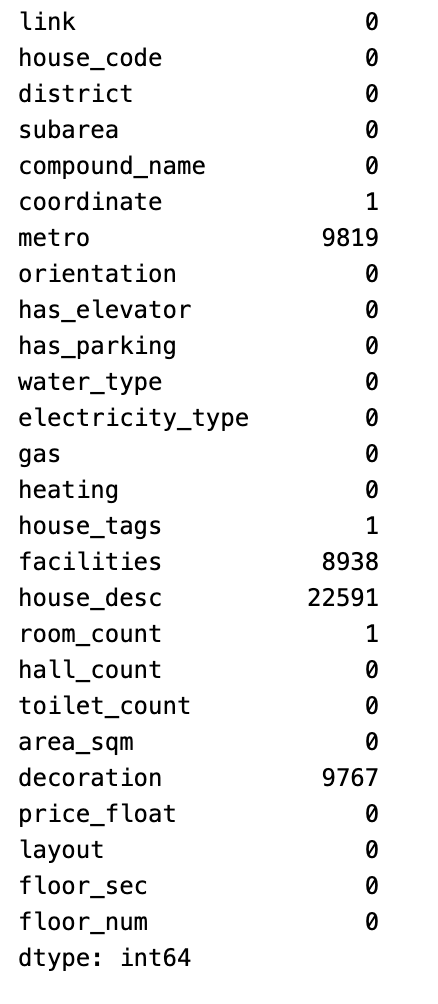

In [8]:
# Filter the rows where either `coordinate` or `house_tags` is null
mask = df['coordinate'].isnull() | df['house_tags'].isnull()| df['room_count'].isnull()

# Select the rows that satisfy the above condition
result = df[mask]

# Print the resulting houses that contains null values
result

,link,house_code,district,subarea,compound_name,coordinate,metro,orientation,has_elevator,has_parking,...,house_desc,room_count,hall_count,toilet_count,area_sqm,decoration,price_float,layout,floor_sec,floor_num
20299,http://sh.lianjia.com/zufang/SH287378853271438...,SH2873788532714389504,松江,松江新城,福都广场锋尚99,"121.25584,31.040236",None,南,有,租用车位,...,None,2.0,1,1,40.00,NaN,2800.0,2室1厅1卫,中楼层,13层
22807,http://sh.lianjia.com/zufang/SH164857066072257...,SH1648570660722573312,青浦,徐泾,虹桥世界中心,"121.310493,31.191102","['2号线 ', ' 徐泾东', '311m'],['17号线 ', ' 诸光路', '10...",南,有,租用车位,...,None,NaN,2,0,75.73,NaN,5900.0,未知室2厅0卫,低楼层,10层
27168,http://sh.lianjia.com/zufang/SH173226235378689...,SH1732262353786896384,普陀,武宁,中山北路3904弄,None,None,南,无,暂无数据,...,None,1.0,1,1,45.56,精装修,4300.0,1室1厅1卫,高楼层,7层


I want to go to the link and check why above 3 houses has null values is common columns
After investigation :
1. House 20299 is invalid, I will delete this row. 
2. House 22807 is invalid,, I will delete this row
3. House 27168 is valid, but I have no idea why coordinate info is missing for this house. As the house of same compound share the same coordinate, I will fill the missing coordinate value
   of this row by copy the coordinate value of same compound '中山北路3904弄'

In [9]:
# Delete the house code SH2873788532714389504 and SH1648570660722573312
# create a list of indices of the rows to be deleted
indices = df[(df['house_code'] == 'SH2873788532714389504') | (df['house_code'] == 'SH1648570660722573312')].index
# delete the rows with the specified indices
df.drop(indices, inplace=True)

# Fill the coordinate of house SH1732262353786896384 with the coordinate of other houses of the same compound

# find the row with missing value in 'coordinate'
missing_row = df.loc[df['coordinate'].isna()]

# fill missing value in 'coordinate' based on values in other rows with the same 'compound name'
fill_value = df.loc[df['compound_name'] == missing_row['compound_name'].iloc[0], 'coordinate'].dropna().iloc[0]
missing_row['coordinate'] = fill_value

# update the DataFrame with the filled value
df.update(missing_row)


/Users/Yaping.Lang/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# Check the df info again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31069 entries, 0 to 31070
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              31069 non-null  object 
 1   house_code        31069 non-null  object 
 2   district          31069 non-null  object 
 3   subarea           31069 non-null  object 
 4   compound_name     31069 non-null  object 
 5   coordinate        31069 non-null  object 
 6   metro             21251 non-null  object 
 7   orientation       31069 non-null  object 
 8   has_elevator      31069 non-null  object 
 9   has_parking       31069 non-null  object 
 10  water_type        31069 non-null  object 
 11  electricity_type  31069 non-null  object 
 12  gas               31069 non-null  object 
 13  heating           31069 non-null  object 
 14  house_tags        31069 non-null  object 
 15  facilities        22132 non-null  object 
 16  house_desc        8480 non-null   object

Below some other string type columns that contains value that can be converted into numerical parameters, I will convert them and then delete original string type columns

In [11]:
import pandas as pd
import numpy as np

# define function to count metro stations
def count_metro_stations(row):
    if pd.isnull(row['metro']):
        return 0
    else:
        return len(eval(row['metro']))

# Define a function to count the number of facilities
def count_facilities(facilities):
    if pd.isnull(facilities):
        return 0
    else:
        return len(facilities.split(','))

if 'num_metro_stations' not in df.columns:
    # create new column to store number of metros nearby, it is derived from metro column.
    df['num_metro_stations'] = df.apply(lambda row: count_metro_stations(row), axis=1)
    # replace any NaN values with 0
    df['num_metro_stations'] = df['num_metro_stations'].fillna(0).astype(np.int64)

if 'room_count' in df.columns:
    # Convert the room counts to integer
    df['room_count'] = df['room_count'].astype(int)
if 'hall_count' in df.columns:
    df['hall_count'] = df['hall_count'].astype(int)
if 'toilet_count' in df.columns:
    df['toilet_count'] = df['toilet_count'].astype(int)

if 'floor_num_int' not in df.columns:
    # Create a new column to store digit part of floor_num string
    df['floor_num_int'] = df['floor_num'].str.extract('(\d+)', expand=False).astype(int, errors='ignore')
    # Drop the original 'floor_num' column if it exists
    df.drop('floor_num', axis=1, inplace=True, errors='ignore')

if 'longitude' not in df.columns:
    # create new columns to store for longitude and latitude value separately , as float 
    df['longitude'] = df['coordinate'].str.split(',').str[0].astype(float)
if 'latitude' not in df.columns:
    df['latitude'] = df['coordinate'].str.split(',').str[1].astype(float)
    df.drop('coordinate', axis=1, inplace=True)

if 'facilities_count' not in df.columns:
    # Apply the function to the "facilities" column and create a new column "facilities_count"
    df['facilities_count'] = df['facilities'].apply(count_facilities)

if 'price_per_sqm' not in df.columns:
    # create a new column to store rental price per square meters 
    df['price_per_sqm'] = df['price_float'] / df['area_sqm']


In [12]:
df.iloc[0]

link                  http://sh.lianjia.com/zufang/SH174097200193103...
house_code                                        SH1740972001931034624
district                                                             静安
subarea                                                              彭浦
compound_name                                                  临汾路1564弄
metro                                                              None
orientation                                                           南
has_elevator                                                          无
has_parking                                                        暂无数据
water_type                                                           民水
electricity_type                                                     民电
gas                                                                   有
heating                                                             自采暖
house_tags                                                 必看好房,

I also notice that, there's some some house are tagged with '非居住', which mean non- residential, it could be office or commercial use. As the price for such rental are very different from residential apartment, which the type of apartment we are interested to analyses. So we will split the df into residential and non residential rental listings and perform the analysis on the residential part. 

In [13]:

# assuming your DataFrame is named `df`
non_residential = df[df['house_tags'].str.contains('非居住')]
residential = df[~df['house_tags'].str.contains('非居住')]

In [14]:
num_non_residential = len(non_residential)
percent_non_residential = num_non_residential / len(df) * 100
print(num_non_residential, percent_non_residential)

num_residential = len(residential)
percent_residential = num_residential / len(df) * 100
print(num_residential,percent_residential)

2049 6.594998229746693
29020 93.4050017702533


Now we can see that we are left with 29020 (93.4%) residential rental listings to deal with. The rest of 2049 (6.5%) are non-residential listings that will leave out.

In [15]:
print("Residential summary statistics:")
print(residential.describe())

print("\nNon-residential summary statistics:")
print(non_residential.describe())

Residential summary statistics:
         room_count    hall_count  toilet_count      area_sqm    price_float  \
count  29020.000000  29020.000000  29020.000000  29020.000000   29020.000000   
mean       2.077739      1.318573      1.245107     83.611848    8388.310200   
std        0.897800      0.616122      0.558496     50.911827    8152.944782   
min        1.000000      0.000000      0.000000      6.300000     700.000000   
25%        1.000000      1.000000      1.000000     51.000000    4800.000000   
50%        2.000000      1.000000      1.000000     75.050000    6200.000000   
75%        3.000000      2.000000      1.000000     99.000000    8800.000000   
max        9.000000      5.000000      9.000000    789.190000  240000.000000   

       num_metro_stations  floor_num_int     longitude      latitude  \
count        29020.000000   29020.000000  29020.000000  29020.000000   
mean             2.023639      12.260476    121.442611     31.213283   
std              1.618897      

In previous steps we removed and corrected some columns and values, next we can one-hot encoding on selected categorical variable and check if there's numerical outliers

In [16]:
residential.columns

Index(['link', 'house_code', 'district', 'subarea', 'compound_name', 'metro',
       'orientation', 'has_elevator', 'has_parking', 'water_type',
       'electricity_type', 'gas', 'heating', 'house_tags', 'facilities',
       'house_desc', 'room_count', 'hall_count', 'toilet_count', 'area_sqm',
       'decoration', 'price_float', 'layout', 'floor_sec',
       'num_metro_stations', 'floor_num_int', 'longitude', 'latitude',
       'facilities_count', 'price_per_sqm'],
      dtype='object')

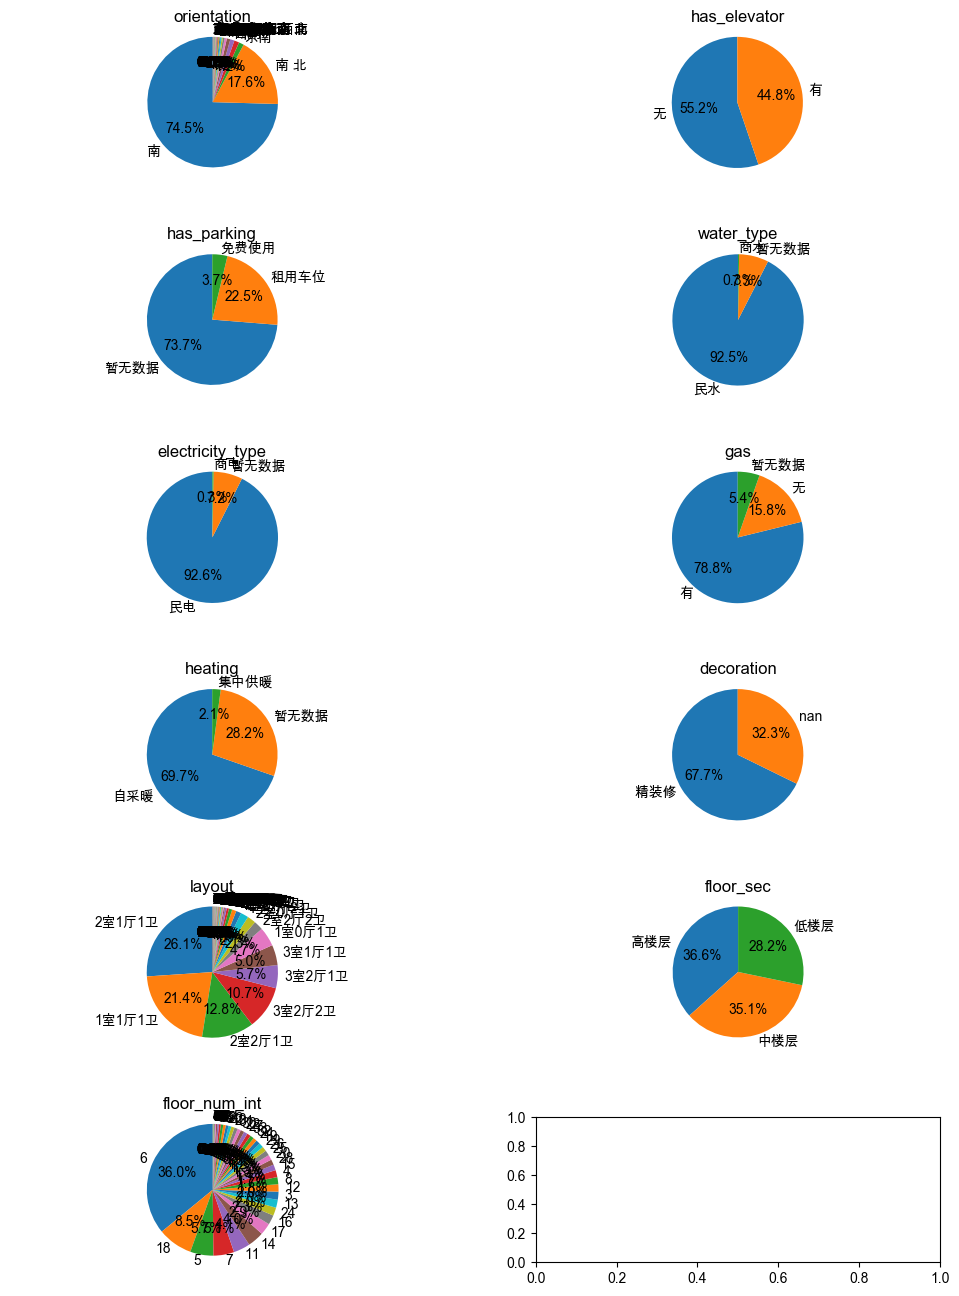

In [21]:
import matplotlib.pyplot as plt

# To plot Chinese characters correctly
plt.rcParams['font.family'] = 'Arial Unicode MS'

selected_cat_columns=['orientation', 'has_elevator', 'has_parking',
       'water_type', 'electricity_type', 'gas', 'heating', 'decoration','layout','floor_sec','floor_num_int']

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(selected_cat_columns) + n_cols - 1) // n_cols

# Create the subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 16))

# Flatten the axs array for easier indexing
axs = axs.ravel()

# Loop through each column
for i, col in enumerate(residential[selected_cat_columns]):
    # Get value counts for column
    counts = residential[col].value_counts(dropna=False)

    # Plot pie chart
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[i])
    axs[i].axis('equal')
    axs[i].set_title(col)

    # Hide the y-axis labels
    axs[i].set_ylabel('')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Display the plots
plt.show()


The pie chart on each categorical variable above helps me identify which categorical variable can be one-hot encoded, and which one are not: 

- Categorical variables that has too many unique values 
  -  it may not be practical to create a separate binary variable for each unique value, as this would result in too many features and potentially overfitting the model
  -  such as : `orientation`, `layout`, `floor_num_int`
- Categorical variables that has fair amount of missing values:
  - Questionable for one-hot encoding but depends on the questions. I'm filling confortable filling the imput the missing values, it's better to keep the missing values as a separate category. Let's save this for later 
  - `has_parking`,`water_type`,`electricity_type`,`gas`,`heating` 
- Categorical variables that suits for one-hot encoding :
  - `has_elevator`, `decoration`,`floor_dec`

Next, let's look at if we have any numerical outliers that may affect 

In [22]:
residential.describe()

,room_count,hall_count,toilet_count,area_sqm,price_float,num_metro_stations,floor_num_int,longitude,latitude,facilities_count,price_per_sqm
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,2.077739,1.318573,1.245107,83.611848,8388.310200,2.023639,12.260476,121.442611,31.213283,4.119159,104.338291
std,0.897800,0.616122,0.558496,50.911827,8152.944782,1.618897,8.557950,0.117073,0.095975,3.228557,49.667191
min,1.000000,0.000000,0.000000,6.300000,700.000000,0.000000,1.000000,120.930790,30.718873,0.000000,6.796117
25%,1.000000,1.000000,1.000000,51.000000,4800.000000,0.000000,6.000000,121.391803,31.163857,0.000000,70.163562
50%,2.000000,1.000000,1.000000,75.050000,6200.000000,2.000000,7.000000,121.450384,31.221156,4.000000,96.595428
75%,3.000000,2.000000,1.000000,99.000000,8800.000000,3.000000,18.000000,121.511894,31.276094,7.000000,129.166980
max,9.000000,5.000000,9.000000,789.190000,240000.000000,17.000000,78.000000,121.939316,31.662014,10.000000,707.964602


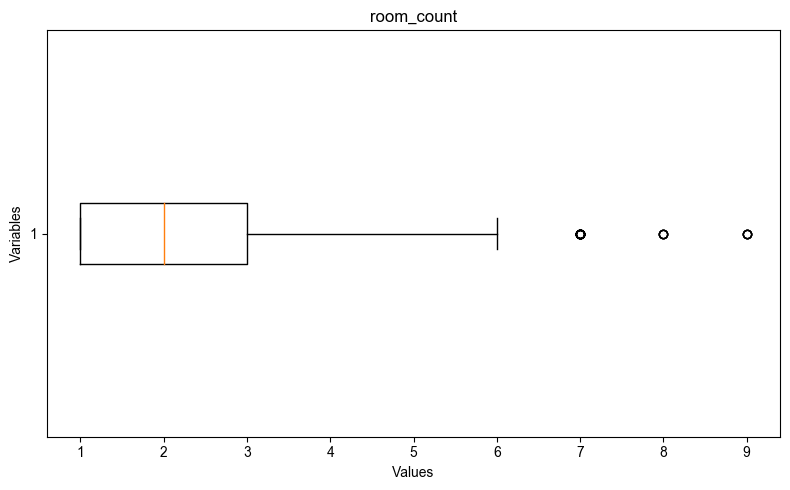

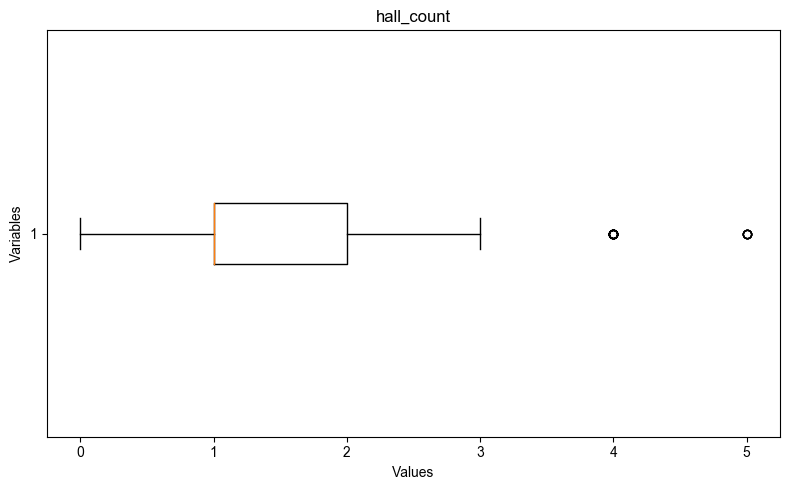

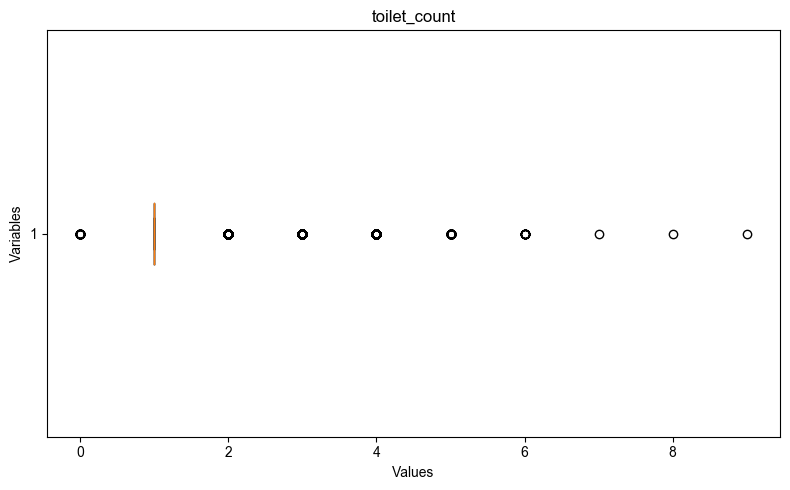

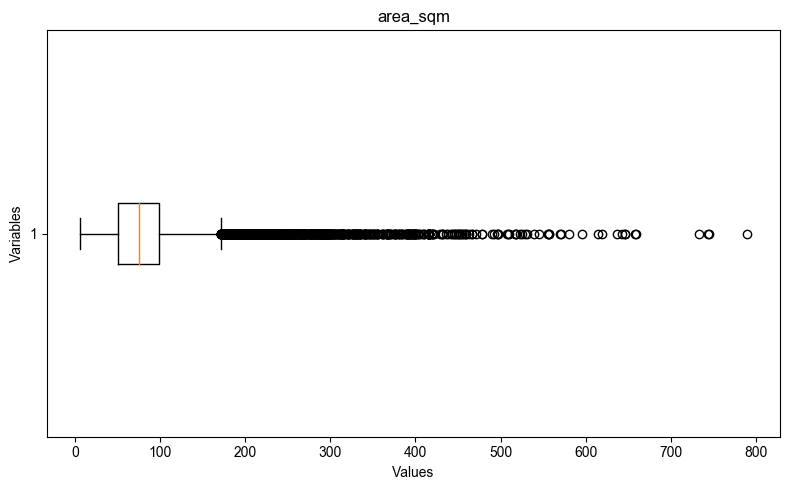

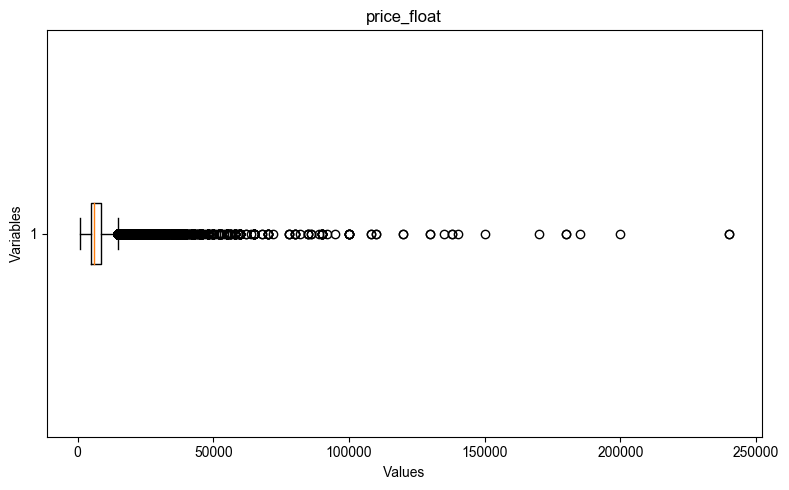

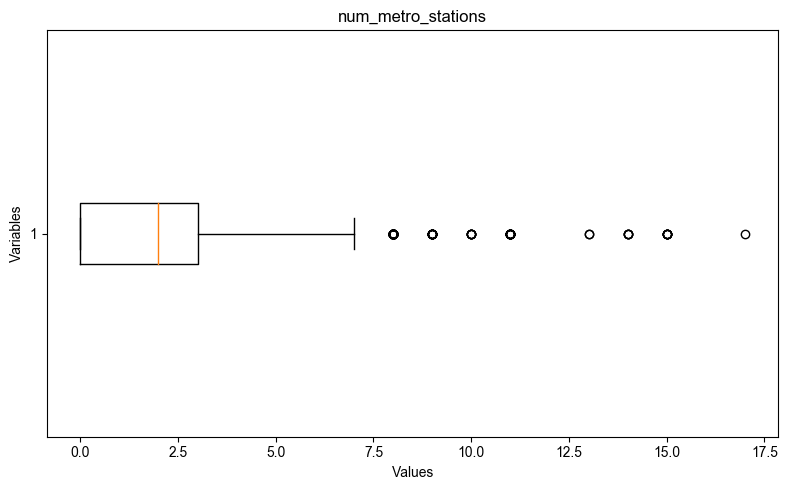

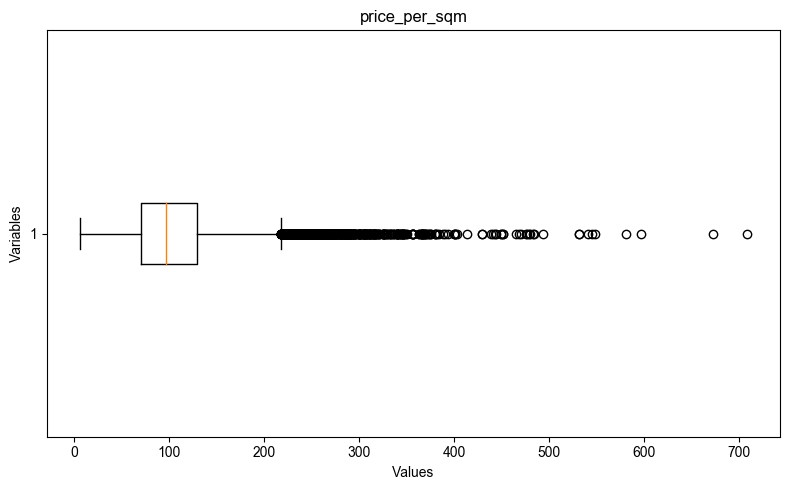

In [23]:
# select numeric columns
numeric_cols = ['room_count', 'hall_count', 'toilet_count', 'area_sqm', 'price_float',                 'num_metro_stations', 'price_per_sqm']

for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.boxplot(residential[col].dropna(), vert=False)
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Variables')

    plt.tight_layout()
    plt.show()


In [24]:
# We notice that there is extreme values here in area
# Let's check out these extreme values, we may need to remove these extreme values 
# for house rent, we can say that houses>1000 sqm is rarely and unlikely.
residential[residential['room_count'] >6]

,link,house_code,district,subarea,compound_name,metro,orientation,has_elevator,has_parking,water_type,...,decoration,price_float,layout,floor_sec,num_metro_stations,floor_num_int,longitude,latitude,facilities_count,price_per_sqm
2789,http://sh.lianjia.com/zufang/SH166780024524269...,SH1667800245242691584,徐汇,植物园,石龙小区,"['3号线 ', ' 石龙路', '449m']",南,无,租用车位,暂无数据,...,精装修,38000.0,9室2厅3卫,低楼层,3,3,121.451545,31.163774,5,200.739567
10251,http://sh.lianjia.com/zufang/SH172399442264902...,SH1723994422649028608,浦东,塘桥,蓝村大厦,"['4号线,6号线 ', ' 蓝村路', '18m'],['4号线,6号线 ', ' 浦电路...",南,有,暂无数据,民水,...,NaN,14500.0,9室0厅1卫,高楼层,3,28,121.534363,31.217291,1,97.814355
11546,http://sh.lianjia.com/zufang/SH169288642037022...,SH1692886420370227200,宝山,杨行,万业紫辰苑,None,南,有,暂无数据,民水,...,NaN,7500.0,7室1厅2卫,低楼层,0,21,121.442506,31.405518,2,46.801872
15187,http://sh.lianjia.com/zufang/SH160470051687130...,SH1604700516871307264,杨浦,新江湾城,建德国际公寓,None,南,有,免费使用,民水,...,精装修,32000.0,7室3厅4卫,高楼层,0,12,121.532875,31.340577,10,131.937000
15471,http://sh.lianjia.com/zufang/SH160034798180080...,SH1600347981800800256,杨浦,新江湾城,银亿领墅,"['18号线 ', ' 殷高路', '600m'],['10号线(新江湾城-虹桥火车站),1...",南,无,免费使用,民水,...,精装修,35000.0,7室2厅5卫,低楼层,4,3,121.504989,31.321216,4,89.743590
19091,http://sh.lianjia.com/zufang/SH173125001215265...,SH1731250012152659968,嘉定,外冈,外冈新苑,None,南,无,暂无数据,民水,...,精装修,14000.0,9室3厅9卫,高楼层,0,6,121.168288,31.371104,7,60.927844
19342,http://sh.lianjia.com/zufang/SH173340128557242...,SH1733401285572427776,崇明,陈家镇,三湘海尚云邸,None,南,无,暂无数据,民水,...,精装修,27000.0,7室3厅6卫,低楼层,0,1,121.840334,31.464170,10,81.887662
19358,http://sh.lianjia.com/zufang/SH166993832830199...,SH1669938328301993984,崇明,陈家镇,览海高尔夫别墅,None,南 北,无,免费使用,民水,...,精装修,32000.0,7室2厅5卫,低楼层,0,3,121.825446,31.468048,10,91.967237
19818,http://sh.lianjia.com/zufang/SH165189628375492...,SH1651896283754921984,松江,新桥,九城家天下新座,"['12号线 ', ' 顾戴路', '96m'],['12号线 ', ' 虹莘路', '93...",南,无,暂无数据,民水,...,精装修,28000.0,7室3厅4卫,低楼层,2,3,121.312757,31.059123,10,69.560033
19857,http://sh.lianjia.com/zufang/SH173376727272128...,SH1733767272721285120,松江,松江大学城,绿地云峰名邸(别墅),None,南,无,暂无数据,暂无数据,...,精装修,15000.0,7室2厅6卫,低楼层,0,3,121.195463,31.052041,6,46.168052


In [28]:
mask = residential['room_count'] <= 6

# select only the rows that match the mask
residential = residential[mask]
residential.describe()

,room_count,hall_count,toilet_count,area_sqm,price_float,num_metro_stations,floor_num_int,longitude,latitude,facilities_count,price_per_sqm
count,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000
mean,2.072232,1.317696,1.241945,83.379316,8367.608210,2.024836,12.266368,121.442644,31.213306,4.119145,104.350015
std,0.881482,0.614878,0.546660,50.313262,8104.598712,1.618779,8.556370,0.116960,0.095947,3.228169,49.657164
min,1.000000,0.000000,0.000000,6.300000,700.000000,0.000000,1.000000,120.930790,30.718873,0.000000,6.796117
25%,1.000000,1.000000,1.000000,51.000000,4800.000000,0.000000,6.000000,121.391903,31.163903,0.000000,70.186247
50%,2.000000,1.000000,1.000000,75.000000,6200.000000,2.000000,7.000000,121.450397,31.221250,4.000000,96.604005
75%,3.000000,2.000000,1.000000,99.000000,8800.000000,3.000000,18.000000,121.511857,31.276183,7.000000,129.166667
max,6.000000,5.000000,6.000000,789.190000,240000.000000,17.000000,78.000000,121.939316,31.662014,10.000000,707.964602


### Now after above steps of data prepocessing, we have roughly correct data format and normal value to start look at do some analysis and answer some statistical questions:


####  1. How is the area distributed , and how does that relate to unit price (price per square meter)? 

In [31]:
# According to the convention, I split the area of an apartment to several levels

# Define bin edges and labels
bins = [0, 50, 70, 90, 110, 130, 150, float('inf')]
labels = ['<50', '50-70', '70-90', '90-110', '110-130', '130-150', '>=150']

# Use pd.cut() to create area_level column
residential['area_level'] = pd.cut(residential['area_sqm'], bins=bins, labels=labels)

{'110-130': 89.75534667619279, '130-150': 104.11796938066527, '50-70': 100.61670244987643, '70-90': 79.89459001486671, '90-110': 87.34185008530024, '<50': 139.21974954261466, '>=150': 124.15802586677978}


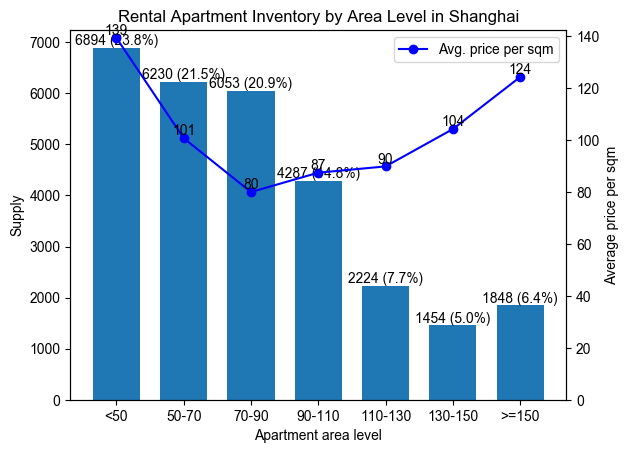

In [32]:
# Create a dictionary to store the average price per square meter for each area level
avg_price_dict = {}
for area_level in residential['area_level'].unique():
    avg_price_dict[area_level] = residential[residential['area_level'] == area_level]['price_per_sqm'].mean()

# Sort the dictionary by the keys (area levels)
avg_price_dict = {k: v for k, v in sorted(avg_price_dict.items(), key=lambda item: item[0])}

print (avg_price_dict)
# Get the x-axis tick locations and labels
xticks = np.arange(len(avg_price_dict))
xlabels = list(avg_price_dict.keys())

# Define the desired order of the x-axis labels
label_order = ['<50', '50-70', '70-90', '90-110', '110-130', '130-150', '>=150']
xlabels = [label for label in label_order if label in xlabels]

# Get the average prices and counts for each area level
avg_prices = [avg_price_dict[label] for label in xlabels]
counts = residential['area_level'].value_counts().loc[xlabels]

# Calculate the percentages
percentages = counts / len(residential) * 100

# Plot the distribution of apartments by area level
fig, ax = plt.subplots()
ax.bar(xticks, counts, align='center', width=0.7)
ax.set_xlabel('Apartment area level')
ax.set_ylabel('Supply')
ax.set_title('Rental Apartment Inventory by Area Level in Shanghai')
ax.set_ylim(bottom=0)

# Add annotations to the bars
for i, count in enumerate(counts):
    ax.annotate(f"{count} ({percentages[i]:.1f}%)", xy=(i, count), ha='center', va='bottom')

# Set the x-axis labels
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

# Add a secondary y-axis for the average prices
ax2 = ax.twinx()
ax2.plot(xticks, avg_prices, 'bo-', label='Avg. price per sqm')
ax2.set_ylabel('Average price per sqm')
ax2.set_ylim(bottom=0)


# Add annotations to the average price points
for i, price in enumerate(avg_prices):
    ax2.annotate(f"{price:.0f}", xy=(i, price), ha='center', va='bottom')

# Show the legend
ax2.legend()
ax.grid(False)
ax2.grid(False)
plt.show()



From above chart, we can see that:
1. When looking at the residential rental apartment supply by area levels, the most popular rental apartment supply is the apartment that is less than 50 square meters, and then as the area size increases,  the lesser the supply. It is understandable in that in big cities like Shanghai (Tokyo. Hong Kong), the housing price is super high, so small to medium sized apartment are most popular. But there's an exception in the bar chart trend, the rental supplies for 'area>=150' is higher than that of '130-150', it could be that there may be more options for larger living spaces (such as villas or townhouses), which may be preferred by some residents over apartments. This could result in a decline in supply of rental apartment in those areas.
2. As for the variation in price per square meter for different area levels,  originally my expectation is that the larger the area, the lower the unit price will be, it's interesting to see that for the price per meter are high in both ends and dips in the middle. It is also understandable after reflection, the total rental price for smaller apartment are lower, it's mostly young workforce renting houses (most single or young couple), therefore there's more demand for smaller apartment, plus there's more small apartment in the city center, and city center prices are higher, so the rental that is less than 50 are most expensive in unit price. The unit price goes down as area increases, it is pretty intuitive. However, the unit price increases again, after passing 90 square meters, when making an educated guess, it could be because of that the apartment larger than 90 square meters are not mere 'economic' apartment that' just for living any more, it is for quality living, which could include rooms other than just sleeping. And further down the spectrum, for houses that;s larger than 150 square meters, they could be in luxurt.
3. My getaway from reading this chart is that if I were to rent an apartment, I will consider 70-90 which yields fairer unit price. 

###  3. What is the rental apartment distribution by district, and how does it relate to unit price?

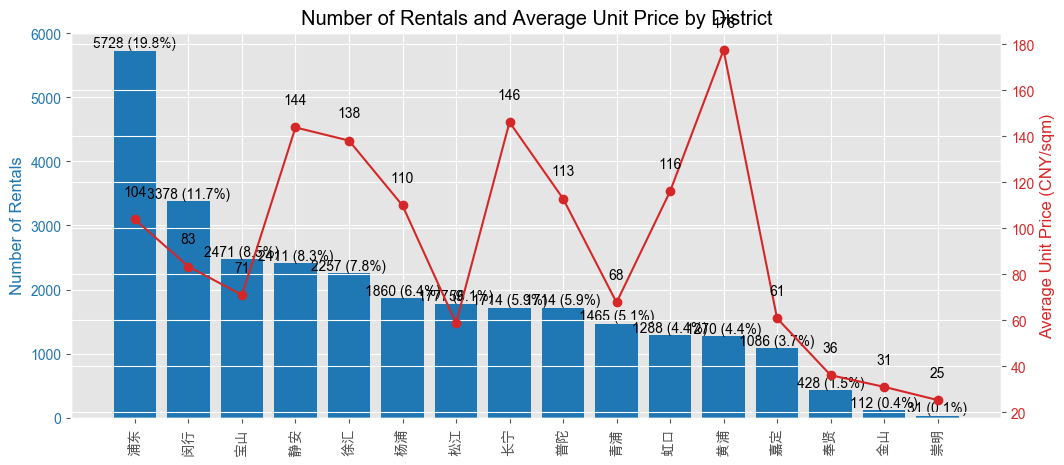

In [35]:
# Calculate the number of rentals and average unit price by district
district_counts = residential['district'].value_counts()
district_prices = residential.groupby('district')['price_per_sqm'].mean()
# Sort the districts by the number of rentals in descending order
sorted_districts = district_counts.sort_values(ascending=False).index

# Plot the number of rentals by district as bars
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.bar(sorted_districts, district_counts[sorted_districts], color='tab:blue')
ax1.set_ylabel('Number of Rentals', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=90)

# Plot the average unit price by district as a line
ax2 = ax1.twinx()
ax2.plot(sorted_districts, district_prices[sorted_districts], 'o-', color='tab:red')
ax2.set_ylabel('Average Unit Price (CNY/sqm)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add text labels for the number of rentals and percentages on top of bars
total_rentals = district_counts.sum()
for i, district in enumerate(sorted_districts):
    count = district_counts[district]
    percent = count / total_rentals * 100
    ax1.text(i, count+50, f'{count} ({percent:.1f}%)', ha='center')
    
# Add text labels for the values of each line dot
for i, price in enumerate(district_prices[sorted_districts]):
    ax2.text(i, price+10, f'{price:.0f}', ha='center')

plt.title('Number of Rentals and Average Unit Price by District')
plt.show()


In [109]:
# Try also plot on a Map
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

# Calculate the number of rentals and average unit price by district
district_counts = residential['district'].value_counts()

district_prices = residential.groupby('district')['price_per_sqm'].mean()

# Modify district names in district_counts variable
district_counts = district_counts.rename(lambda x: x+'新区' if x == '浦东' else x+'区')
# Modify district names in district_prices variable
district_prices = district_prices.rename(lambda x: x+'新区' if x == '浦东' else x+'区')

# Create a Map chart using pyecharts
map_chart = Map()
map_chart.set_global_opts(
    title_opts=opts.TitleOpts(title='Number of Rentals and Average Unit Price by District'),
    tooltip_opts=opts.TooltipOpts(
        formatter='{b}<br/>Number of Rentals: {c}<br/>Average Unit Price: {d} CNY/sqm'
    ),
    legend_opts=opts.LegendOpts(is_show=True)
)
# Add series to the chart for the number of rentals and average unit price by district
map_chart.add(
    series_name='Number of Rentals',
    data_pair=[(district, count) for district, count in district_counts.items()],
    maptype='上海'
)
map_chart.add(
    series_name='Average Unit Price',
    data_pair=[(district, price) for district, price in district_prices.items()],
    maptype='上海',
    is_selected=False,
    itemstyle_opts=opts.ItemStyleOpts(color='#d14a61'),
)
# Render the chart
map_chart.render_notebook()

From above chart, we can see that: 
1. In terms of number of offerings, it's interesting to see that the order in Histogram is **浦东 >闵行>宝山>静安**>徐汇>杨浦>松江>长宁>普陀>青浦>虹口>黄浦>嘉定>奉贤>金山>崇明.
I'm thinking that maybe the area of the district affects how many available rents are in each district, so I went to check 2022 Shanghai Statistical Year Book, and find this image.   
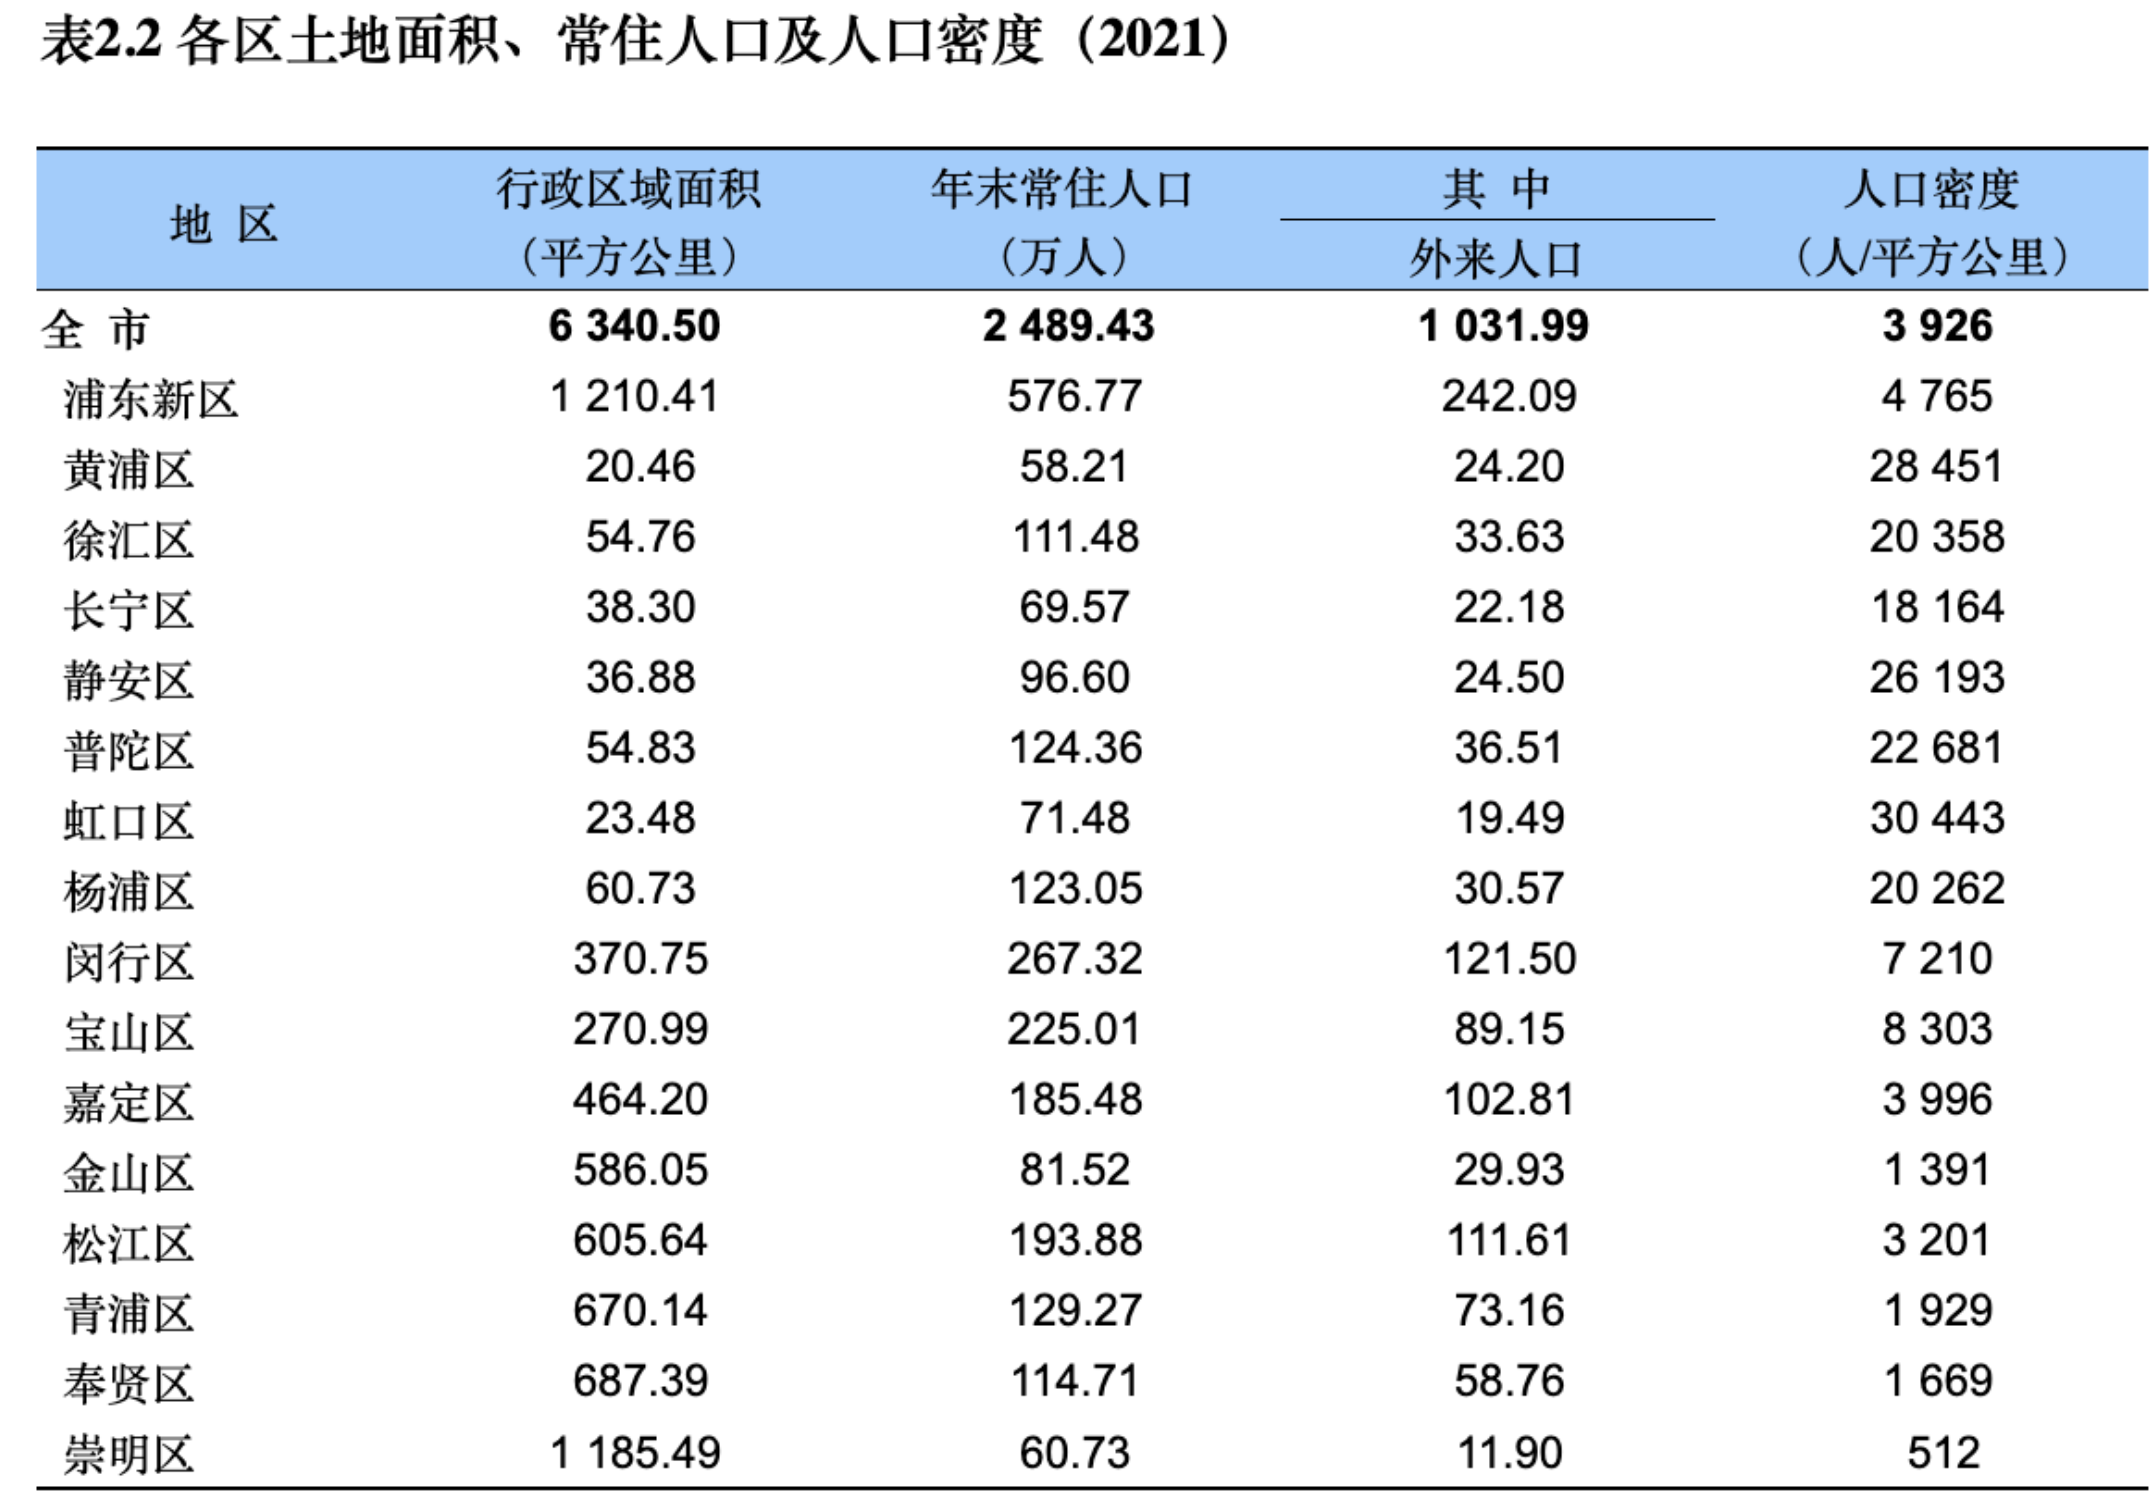

After comparing the order,I find that the number of rent houses available is more related to the resident population of the district than to the area. 

1. In terms of unit price by district, it comes no surprise that **黄浦>长宁>静安>徐汇**>虹口>杨浦>浦东>闵行>宝山>青浦>松江>嘉定>奉贤>金山>崇明
It seems to me that the unit price varies to the distance to the city center , the district that's closer to city center has higher unit price that those are further away. 


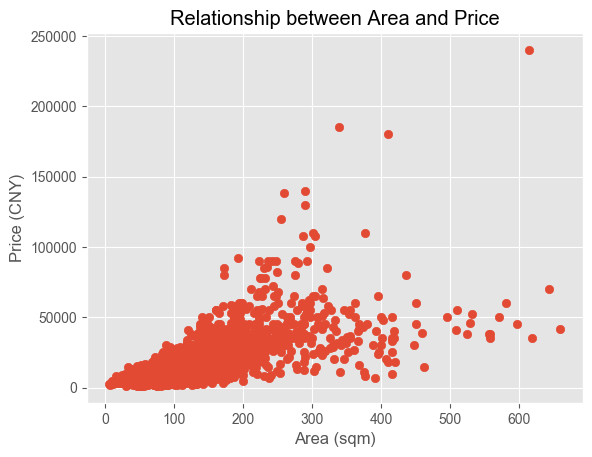

In [115]:
# Plot log_price against area
plt.scatter(residential['area_sqm'], residential['price_float'])
plt.xlabel('Area (sqm)')
plt.ylabel('Price (CNY)')
plt.title('Relationship between Area and Price')
plt.show()


#### 4. Is there noticeable difference in price per square meters rental price for those who has description and those doesn't have ?

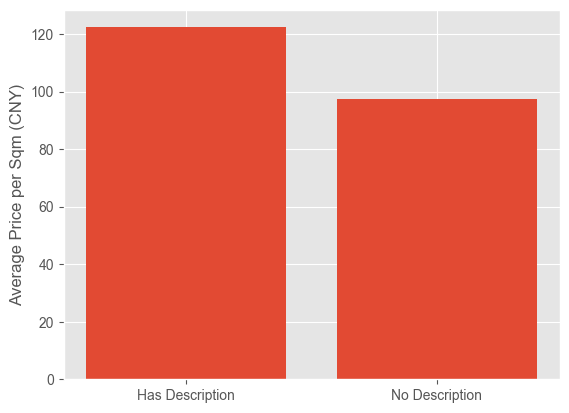

In [37]:
# Create subsets of the data with non-null and null house_description values
has_description = residential[residential['house_desc'].notnull()]
no_description = residential[residential['house_desc'].isnull()]

# Calculate the average price for each subset
has_desc_avg_price = has_description['price_per_sqm'].mean()
no_desc_avg_price = no_description['price_per_sqm'].mean()

# Plot the average prices for each subset
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(['Has Description', 'No Description'], [has_desc_avg_price, no_desc_avg_price])
ax.set_ylabel('Average Price per Sqm (CNY)')
plt.show()


From above chart, we can see that rental listings that have descriptions has noticeable higher price than those that don't have. 
It might be that the rental listings with description filled are apartment that has highlight in its amenity, decorations, etc so it is filled with ample information,  and they are likely be actively maintained by agent/landlord to fill in details of the listings, therefore they are more expensive. 

#### 5. Can we draw a word cloud on the all the descriptions? What would it be like ?

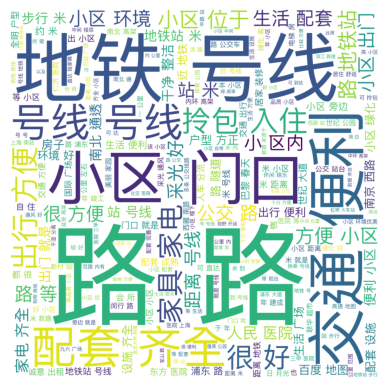

In [116]:
import jieba
from wordcloud import WordCloud
import re

# Filter out rows where the house_desc is null
residential = residential[residential['house_desc'].notnull()]

# Define custom stop words
stop_words = [' ', '的', '了', '和', '是', '在', '有', '中', '为', '以', '及', '上', '下']

# Use jieba to segment the text and join the words together
text = ' '.join(jieba.cut(''.join(residential['house_desc']), cut_all=False, HMM=True))

# Remove words inside brackets 【】 using regular expression
text = re.sub('\【.*\】', '', text)
# Define a Chinese font
font_path = '/System/Library/Fonts/PingFang.ttc'
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', font_path=font_path, stopwords=stop_words).generate(text)

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


From above word cloud, I can see that “交通便利” “地铁” “配套齐全” “拎包入住” are the most frequent mentioned words. It indicates that landlord like to use 'Close to Metro', 'fully equipped and furnished' to attract tenants.

#### 6. Which subarea has the most apartment supply and why ? Where there are more housing resouces in a subarea, the rent price should be more affordable as the supply is higher.

In [1]:

counts = residential.groupby(['district', 'subarea']).size().reset_index(name='count')
# sort the values by count in descending order
counts = counts.sort_values(by='count', ascending=False)

# print the counts
print(counts)


NameError: name 'residential' is not defined

In [ ]:
# I also want to know the average price_per_sqm for each subarea and see which subareas has the highest and lowest price

x=df.groupby(['district', 'subarea','compound_name'])['price_per_sqm'].mean().sort_values(ascending=False)

df_count = df.groupby(['district', 'subarea', 'compound_name'])['price_per_sqm'].mean().reset_index()
df_count['count'] = df.groupby(['district', 'subarea', 'compound_name'])['price_per_sqm'].count().values
df_count = df_count.sort_values(by='price_per_sqm', ascending=False).reset_index(drop=True)

df_count[df_count['price_per_sqm'] <=100].head(500)


In [123]:
group_district_area = residential.groupby('district')['area_sqm'].mean().sort_values(ascending=False).reset_index()
group_district_area


,district,area_sqm
0,崇明,410.640000
1,青浦,227.564237
2,松江,111.697321
3,普陀,103.456553
4,闵行,98.465996
5,金山,97.093529
6,奉贤,94.516154
7,黄浦,91.299866
8,浦东,90.233388
9,宝山,88.224923


In [ ]:
# in which region/subarea/compound has the most houses that's less than sqm 100 and above 40 sqm.

In [128]:
residential.columns

Index(['link', 'house_code', 'district', 'subarea', 'compound_name', 'metro',
       'orientation', 'has_elevator', 'has_parking', 'water_type',
       'electricity_type', 'gas', 'heating', 'house_tags', 'facilities',
       'house_desc', 'room_count', 'hall_count', 'toilet_count', 'area_sqm',
       'decoration', 'price_float', 'layout', 'floor_sec',
       'num_metro_stations', 'floor_num_int', 'longitude', 'latitude',
       'facilities_count', 'price_per_sqm', 'area_level'],
      dtype='object')

In [129]:
q1 = residential[['area_sqm','price_float']].quantile(0.25)
q3 = residential[['area_sqm','price_float']].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower bounds for outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# identify the outliers in each column
outliers = pd.DataFrame()
for col in residential[['area_sqm','price_float']].columns:
    outliers[col] = (residential[col] < lower_bound[col]) | (residential[col] > upper_bound[col])

# print the outliers
print(outliers.sum())

area_sqm       341
price_float    687
dtype: int64


18        2500.0
24        5900.0
25       25000.0
28        3500.0
33        4000.0
          ...   
31063     5800.0
31066    31000.0
31067    45000.0
31069     9000.0
31070     8000.0
Name: price_float, Length: 8017, dtype: float64

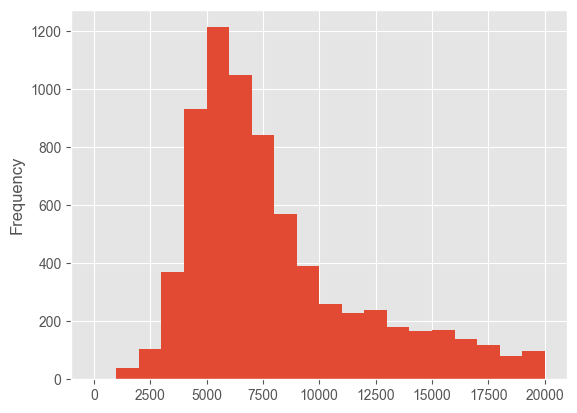

In [136]:
pd.to_numeric(residential["price_float"]).plot.hist(bins=20, range=(1,20000))

pd.to_numeric(residential["price_float"])

1. What is the average rental price per square meter in each district and subarea?

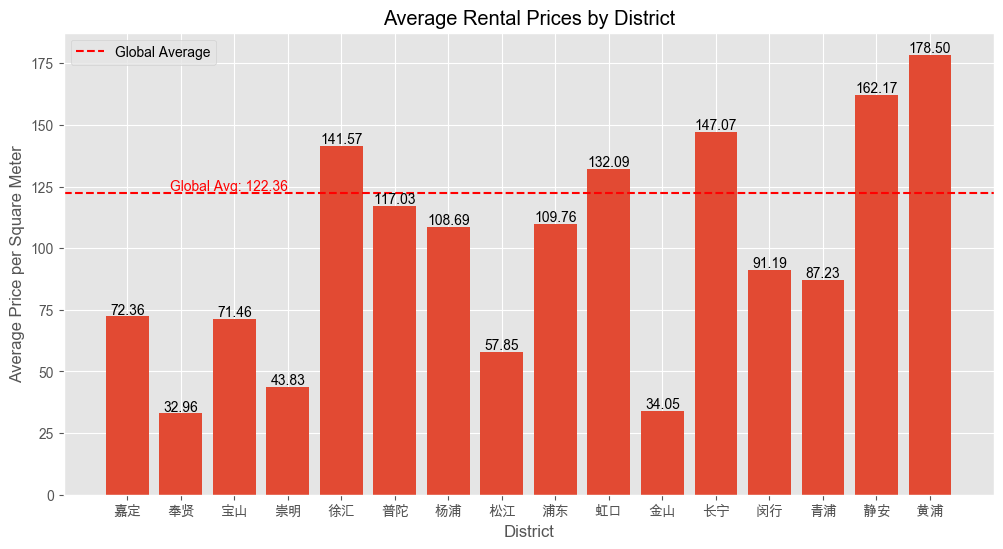

In [ ]:
# group by district and calculate average price per square meter
district_price = residential.groupby('district')['price_per_sqm'].mean()

# calculate global average price per square meter
global_avg_price = residential['price_per_sqm'].mean()

# plot bar chart of district average prices with global average line
plt.figure(figsize=(12,6))
plt.bar(district_price.index, district_price.values)
plt.axhline(y=global_avg_price, color='r', linestyle='--', label='Global Average')
plt.xticks(rotation=0, ha='center')  # rotate labels and set horizontal alignment
plt.xlabel('District')
plt.ylabel('Average Price per Square Meter')
plt.title('Average Rental Prices by District')
plt.legend()

# add values to each bar
for i, v in enumerate(district_price.values):
    plt.text(i, v+1, '{:.2f}'.format(v), ha='center')

# add value for global average line
plt.text(len(district_price)*0.05, global_avg_price+1, 'Global Avg: {:.2f}'.format(global_avg_price), color='r')

plt.show()


 2. How does the price per square meter vary based on the number of bedrooms or bathrooms in the apartment?

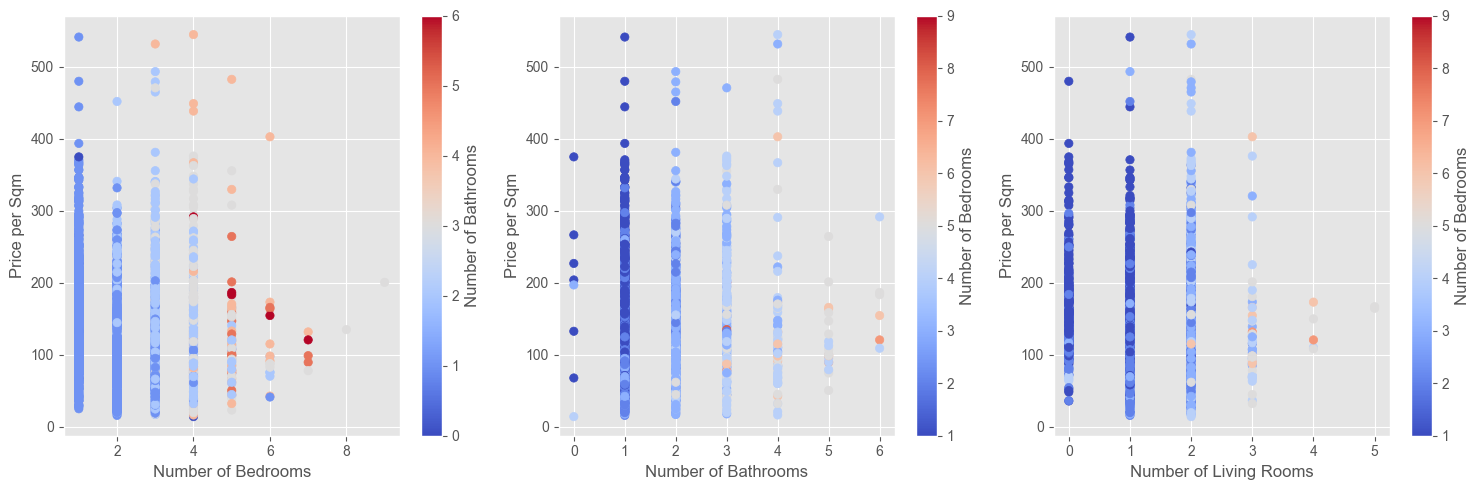

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))

# create a scatter plot for number of bedrooms vs. price per sqm
scatter1 = ax1.scatter(residential['room_count'], residential['price_per_sqm'], c=residential['toilet_count'], cmap='coolwarm')
ax1.set_xlabel('Number of Bedrooms')
ax1.set_ylabel('Price per Sqm')
fig.colorbar(scatter1, ax=ax1, label='Number of Bathrooms')

# create a scatter plot for number of bathrooms vs. price per sqm
scatter2 = ax2.scatter(residential['toilet_count'], residential['price_per_sqm'], c=residential['room_count'], cmap='coolwarm')
ax2.set_xlabel('Number of Bathrooms')
ax2.set_ylabel('Price per Sqm')
fig.colorbar(scatter2, ax=ax2, label='Number of Bedrooms')

# create a scatter plot for number of living rooms vs. price per sqm
scatter3 = ax3.scatter(residential['hall_count'], residential['price_per_sqm'], c=residential['room_count'], cmap='coolwarm')
ax3.set_xlabel('Number of Living Rooms')
ax3.set_ylabel('Price per Sqm')
fig.colorbar(scatter3, ax=ax3, label='Number of Bedrooms')

plt.tight_layout()
plt.show()


3. Is there a correlation between the apartment's proximity to a metro station and its rental price?

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

# Define a function to calculate the distance between two coordinates
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).km

# Create numpy arrays with the coordinates of apartments and metro stations
apt_coords = np.radians(residential[['latitude', 'longitude']].values)
metro_coords = np.radians(np.array([(s['lat'], s['lng']) for s in stations]))

# Calculate the distances between all pairs of apartments and metro stations using broadcasting
dlat = metro_coords[:, 0, np.newaxis] - apt_coords[:, 0]
dlon = metro_coords[:, 1, np.newaxis] - apt_coords[:, 1]
a = np.sin(dlat/2)**2 + np.cos(apt_coords[:, 0]) * np.cos(metro_coords[:, 0, np.newaxis]) * np.sin(dlon/2)**2
c = 2 * np.arcsin(np.sqrt(a))
distances = 6371 * c

# Find the index of the nearest metro station for each apartment
nearest_metro_idx = np.argmin(distances, axis=0)

# Add a new column to the residential dataframe with the distance to the nearest metro station
residential['dist_to_metro'] = distances[nearest_metro_idx, np.arange(len(nearest_metro_idx))]

# Check the correlation between the distance to the nearest metro station and the rental price
correlation = residential['dist_to_metro'].corr(residential['price_float'])
print('Correlation between distance to nearest metro station and rental rice: {:.2f}'.format(correlation))


Correlation between distance to nearest metro station and rental rice: -0.09


The calculated Correlation between distance to nearest metro station and rental rice: -0.09.
It indicates a weak negative correlation between distance to nearest metro station and rental price. This means that as the distance to the nearest metro station increases, there is a slight decrease in rental price, but the relationship is not very strong. Other factors likely play a more significant role in determining rental prices.

To further investigate how metro stations nearby will affect the rental price of a house, I want to investigate if number of metro stations within 1km of the house will be a more significant factor in determining rental price.

In [ ]:
from scipy.spatial import KDTree

# convert latitudes and longitudes to radians
residential_rad = np.radians(residential[['latitude', 'longitude']].values)
metro_coords_rad = np.radians(np.array([(s['lat'], s['lng']) for s in stations]))

# build a KDTree from the metro coordinates
metro_tree = KDTree(metro_coords_rad)

# query the KDTree to find the nearest metro station for each residential property
distances, indices = metro_tree.query(residential_rad, k=1)

# calculate the distance to the nearest metro station for each residential property
residential['dist_to_metro'] = distances * 6371

# find the metro stations within a 1km radius of each residential property
within_radius = metro_tree.query_ball_point(residential_rad, r=1/6371)

# count the number of metro stations within a 1km radius for each residential property
residential['num_metro_stations'] = [len(x) for x in within_radius]

# calculate the correlation between the number of metro stations within a 1km radius and the rental price
correlation = residential['num_metro_stations'].corr(residential['price_float'])
print('Correlation between number of metro stations within 1km radius and rental price: {:.2f}'.format(correlation))


Correlation between number of metro stations within 1km radius and rental price: 0.16


The correlation coefficient of 0.16 suggests a weak positive correlation between the number of metro stations within a 1km radius and the rental price. This means that as the number of metro stations within 1km of the house increases, the rental price tends to increase slightly. However, the correlation is not very strong, so there are likely other factors that also influence the rental price.

4. Which districts and subareas have the highest and lowest rental prices?

In [ ]:
# Group the data by district and subarea and calculate the mean rental price
grouped_price= residential.groupby(['district', 'subarea'])['price_float'].mean()

grouped_unit_price = residential.groupby(['district', 'subarea'])['price_per_sqm'].mean()
# Sort the groups by mean rental price in descending order
sorted_grouped = grouped_price.sort_values(ascending=False)
sorted_grouped_unit_price= grouped_unit_price.sort_values(ascending=False)

# Print the top 10 districts and subareas with the highest mean rental prices
print("Top 10 districts and subareas with the highest mean rental prices:")
print(sorted_grouped.head(10))

print("Top 10 districts and subareas with the highest mean unit rental prices:")
print(sorted_grouped_unit_price.head(10))

# Print the top 10 districts and subareas with the lowest mean rental prices
print("\nTop 10 districts and subareas with the lowest mean rental prices:")
print(sorted_grouped.tail(10))

print("\nTop 10 districts and subareas with the lowest mean unit rental prices:")
print(sorted_grouped_unit_price.tail(10))


Top 10 districts and subareas with the highest mean rental prices:
district  subarea
黄浦        黄浦滨江       31263.043478
徐汇        徐汇滨江       29091.921569
黄浦        老西门        25770.312500
          新天地        25696.875000
闵行        华漕         22144.444444
黄浦        豫园         21613.636364
青浦        徐泾         21039.130435
松江        佘山         20875.000000
杨浦        新江湾城       20512.903226
长宁        古北         20230.769231
Name: price_float, dtype: float64
Top 10 districts and subareas with the highest mean unit rental prices:
district  subarea
黄浦        新天地        228.763046
徐汇        建国西路       216.583488
黄浦        淮海中路       215.495755
徐汇        衡山路        197.424284
黄浦        黄浦滨江       197.065782
徐汇        徐汇滨江       195.068257
黄浦        老西门        190.439911
静安        静安寺        189.529752
          南京西路       188.356476
黄浦        南京东路       182.092862
Name: price_per_sqm, dtype: float64

Top 10 districts and subareas with the lowest mean rental prices:
district  subarea
青浦        

5. What is the most common type of apartment layout (number of bedrooms, bathrooms, etc.) overall , and in each district?

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# create a new column 'bed_liv_room' based on the 'layout' column
if 'bed_liv_room' not in residential.columns:
    residential['bed_liv_room'] = residential['layout'].str.extract(r'(\d+室\d+厅)')

# get the overall count and percentage of apartment layouts
overall_counts = residential['bed_liv_room'].value_counts()
overall_percentages = 100 * overall_counts / len(residential)

# plot pie chart for overall distribution
total = overall_counts.sum()
labels = [f"{label}\n{count}\n({100 * count/total:.1f}%)" for label, count in zip(overall_counts.index, overall_counts)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(overall_counts, labels=labels, autopct='')
ax.set_title('Distribution of Apartment Layouts (Overall)')

# set legend and adjust font size
legend = plt.legend(title='Layout', bbox_to_anchor=(1.1, 1), loc='upper left', fontsize='12')
plt.setp(legend.get_texts(), fontsize='12')
plt.show()


NameError: name 'residential' is not defined

We can see that the 10 most popular rental apartment layout in the rent market are:
      count  percentage
2室1厅   8138   26.196684
1室1厅   7165   23.064542
3室2厅   5044   16.236923
2室2厅   4609   14.836633
3室1厅   1743    5.610816
1室0厅   1565    5.037824
4室2厅   1034    3.328505
2室0厅    654    2.105263
1室2厅    436    1.403509
5室2厅    169    0.544021

It is pretty understandable that in metropolitan city like Shanghai, due to the limited land resources and increasing population density, most houses are designed in medium and small sizes. 

For the top one ,2室1厅, 2 bedroom 1 living room , suitable for medium-sized families
For the 2nd one, 1室1厅, 2 bedroom 1 living room, suitable for single individuals, young couples, and small families
For the 3rd one, 3室2厅, 3 bedroom 2 living room, suitable for larger families or people with more demand for space 

Additionally, according to a report by E-house China R&D Institute, one-bedroom and two-bedroom apartments accounted for around 70% of the total new residential supply in Shanghai in 2020, while three-bedroom apartments accounted for around 20%.

I'm curious to see what't the most popular rental apartment layout in each district

In [ ]:
# Group by district, and find the mode of layout type
mode_df = residential.groupby(['district'])[['room_count', 'hall_count']].agg(lambda x: x.mode()[0])

# Print the result
print(mode_df)


          room_count  hall_count
district                        
嘉定                 2           1
奉贤                 2           2
宝山                 2           1
崇明                 5           2
徐汇                 2           1
普陀                 2           2
杨浦                 2           1
松江                 2           2
浦东                 2           1
虹口                 2           1
金山                 2           2
长宁                 2           1
闵行                 2           1
青浦                 4           2
静安                 1           1
黄浦                 2           1


The result is : 
          room_count  hall_count
district                        
嘉定                 2           1
奉贤                 2           2
宝山                 2           1
崇明                 5           2
徐汇                 2           1
普陀                 2           2
杨浦                 2           1
松江                 2           2
浦东                 2           1
虹口                 2           1
金山                 2           2
长宁                 2           1
闵行                 2           1
青浦                 4           2
静安                 1           1
黄浦                 2           1

The data stands out to me is 
1. 静安， the most common layout is 1bed 1 living room, 
2. 崇明 and 青浦， the most common layout are having 4 or more bedrooms, it is most likely because 崇明 is suburb where there are a lot of farmhouses that tend to have bedrooms. And for 青浦，which is known for suburb villa area, it is understandable that villa will have more bedrooms.

6. Are there certain features or amenities (such as parking or an elevator) that tend to be associated with higher rental prices?

In [ ]:
from math import radians, sin, cos, sqrt, atan2

# Coordinates of People's Square
ppl_sq_lat = 31.2304
ppl_sq_lon = 121.4737

# Haversine formula to calculate distance between two sets of coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km

    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate the difference between the two latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calculate the distance using the Haversine formula
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

# Create a new column in the DataFrame with the distance to People's Square
residential['distance_to_ppl_sq'] = residential.apply(
    lambda row: haversine(row['latitude'], row['longitude'], ppl_sq_lat, ppl_sq_lon), axis=1)


NameError: name 'residential' is not defined

In [ ]:
from math import radians, sin, cos, sqrt, atan2

# Coordinates of People's Square
ppl_sq_lat = 31.2304
ppl_sq_lon = 121.4737

# Haversine formula to calculate distance between two sets of coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km

    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate the difference between the two latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calculate the distance using the Haversine formula
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

# Create a new column in the DataFrame with the distance to People's Square
residential['distance_to_ppl_sq'] = residential.apply(
    lambda row: haversine(row['latitude'], row['longitude'], ppl_sq_lat, ppl_sq_lon), axis=1)


NameError: name 'residential' is not defined

In [ ]:
one_hot_cols = ['has_elevator', 'decoration', 'floor_sec']
residential_one_hot = pd.get_dummies(residential, columns=one_hot_cols)

correlations = residential_one_hot.corr()['price_float'].abs().sort_values(ascending=False)

print(correlations)

NameError: name 'residential' is not defined

In [ ]:
residential_one_hot.describe()
residential_one_hot[residential_one_hot['metro_stations_within_1km']==12]


NameError: name 'residential_one_hot' is not defined

This is a correlation table showing the correlation coefficient between the rental price and each of the other variables. The correlation coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation (the two variables move in the same direction), 0 indicates no correlation, and -1 indicates a perfect negative correlation (the two variables move in opposite directions).

For example, the variable with the highest positive correlation with the rental price is area_sqm, with a correlation coefficient of 0.73. This suggests that there is a strong positive linear relationship between area size and the rental price itself. The next highest positive correlation is with the toilet_count variable, indicating that apartments has more toilets tend to have higher rental prices.

On the other hand, variables such as has_elevator_无 (no elevator) and dist_to_metro have negative correlation coefficients, suggesting that these features are associated with lower rental prices. The correlation between num_metro_stations and rental price is positive but weaker than other features, indicating that having more nearby metro stations is associated with higher rental prices, but the effect is not as strong as other factors such as apartment size or the presence of an elevator.

7. How do apartment prices vary based on the floor the apartment is on (higher or lower floors)?

<AxesSubplot:xlabel='floor_sec', ylabel='price_float'>

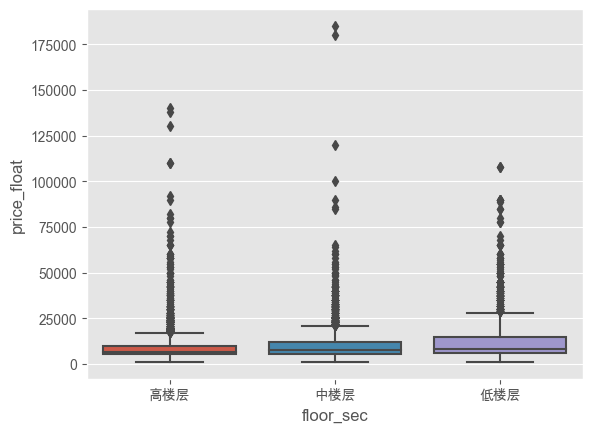

In [ ]:
import seaborn as sns

sns.boxplot(x='floor_sec', y='price_float', data=residential)


The resulting plot is a box plot that shows the distribution of apartment prices for each floor section. The x-axis represents the floor section, and the y-axis represents the apartment prices. The boxes in the plot show the interquartile range (IQR), with the horizontal line inside the box representing the median. The whiskers extend to the minimum and maximum values that fall within 1.5 times the IQR from the box. Any outliers beyond the whiskers are shown as individual points.

From the plot, it appears that apartments on the middle floor section tend to have higher prices than those on the low or high floor sections. The low and high floor sections have similar price ranges and median prices, but the low floor section has more outliers with higher prices. Overall, the floor section appears to be a factor that influences apartment prices, with apartments on the middle floor section generally being more expensive.

In [ ]:
8. Which apartment complexes or buildings have the highest and lowest rental prices per square meter?

Object `meter` not found.


In [ ]:
import pandas as pd

# group the data by community and calculate the average price_per_sqm
community_avg_price = residential.groupby('compound_name')['price_per_sqm'].mean()

# sort the resulting DataFrame by price_per_sqm in descending order to get the communities with the highest rental prices per square meter
highest_price_communities = community_avg_price.sort_values(ascending=False).head()

# sort the resulting DataFrame by price_per_sqm in ascending order to get the communities with the lowest rental prices per square meter
lowest_price_communities = community_avg_price.sort_values().head()

print("Communities with highest rental prices per square meter:")
print(highest_price_communities)

print("\nCommunities with lowest rental prices per square meter:")
print(lowest_price_communities)


Communities with highest rental prices per square meter:
compound_name
长乐路47弄      541.401274
古北壹号        501.318315
郑家巷小区       480.000000
翠湖天地五期      468.443089
襄阳南路389弄    451.943356
Name: price_per_sqm, dtype: float64

Communities with lowest rental prices per square meter:
compound_name
绿地香颂(奉贤)(别墅)     14.293655
布鲁斯小镇(一期)(别墅)    17.600676
泷湾苑              18.927196
金碧苑              19.047619
向阳东路7号           19.745109
Name: price_per_sqm, dtype: float64


9. Can we build a model to predict the rental price of an apartment given its features, such as location, size, number of rooms, etc.?

In [ ]:
residential_one_hot.columns

Index(['link', 'house_code', 'district', 'subarea', 'compound_name',
       'coordinate', 'metro', 'orientation', 'has_parking', 'water_type',
       'electricity_type', 'gas', 'heating', 'house_tags', 'facilities',
       'house_desc', 'room_count', 'hall_count', 'toilet_count', 'area_sqm',
       'price_float', 'layout', 'floor_num', 'num_metro_stations',
       'floor_num_int', 'longitude', 'latitude', 'bed_liv_room',
       'price_per_meter', 'price_per_sqm', 'area_level', 'log_price',
       'dist_to_metro', 'metro_stations_within_1km', 'distance_to_ppl_sq',
       'has_elevator_无', 'has_elevator_有', 'decoration_ 精装修', 'floor_sec_中楼层',
       'floor_sec_低楼层', 'floor_sec_高楼层'],
      dtype='object')

In [ ]:

# Connect to the database
conn = sqlite3.connect('./db/house_sell_lianjia.db')

# Create a cursor object
c = conn.cursor()

# Query the database and fetch all the data from a table
c.execute("SELECT 小区 FROM unique_zhuzhai_xiaoqu")
xiaoqus = [row[0] for row in c.fetchall()]
print(len(xiaoqus))
# Close the database connection
conn.close()


9686


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the features and target variable
features = ['area_sqm', 'room_count', 'hall_count','toilet_count', 'floor_num_int','has_elevator_有', 'has_elevator_无','metro_stations_within_1km']
target = 'price_float'

# Create new features
print(residential_one_hot.shape)
apartments = residential_one_hot[residential_one_hot['area_sqm'] <= 150]
apartments = apartments[apartments['compound_name'].isin(xiaoqus)]
# Select only relevant features
residential_selected = apartments[features + [target]]
residential_selected.fillna(0, inplace=True)
print(residential_selected.shape)
print("Number of NaN values:\n", residential_selected.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(residential_selected[features], residential_selected[target], test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear regression mean squared error: ", mse)

# Try a random forest model
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Evaluate the random forest model on the testing data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random forest mean squared error: ", mse)


(8009, 41)
(6556, 9)
Number of NaN values:
 area_sqm                     0
room_count                   0
hall_count                   0
toilet_count                 0
floor_num_int                0
has_elevator_有               0
has_elevator_无               0
metro_stations_within_1km    0
price_float                  0
dtype: int64
Linear regression mean squared error:  11983950.809061397


/Users/Yaping.Lang/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Random forest mean squared error:  10105730.289372852


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)


Mean squared error:  10020765.191996183


10. Can we use neural networks to predict the rental price of an apartment given its features, and compare the performance of this model with other machine learning models?

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(residential_selected[features], residential_selected[target], test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = mean_squared_error(y_test, model.predict(X_test_scaled))
print("Neural network mean squared error: ", mse)


Epoch 1/100
132/132 [==============================] - 1s 3ms/step - loss: 99583136.0000 - val_loss: 96514376.0000
Epoch 2/100
132/132 [==============================] - 0s 1ms/step - loss: 93639936.0000 - val_loss: 83489864.0000
Epoch 3/100
132/132 [==============================] - 0s 1ms/step - loss: 71887248.0000 - val_loss: 52955736.0000
Epoch 4/100
132/132 [==============================] - 0s 1ms/step - loss: 40284836.0000 - val_loss: 24563110.0000
Epoch 5/100
132/132 [==============================] - 0s 1ms/step - loss: 20142778.0000 - val_loss: 14406601.0000
Epoch 6/100
132/132 [==============================] - 0s 1ms/step - loss: 14716611.0000 - val_loss: 12754174.0000
Epoch 7/100
132/132 [==============================] - 0s 2ms/step - loss: 13426215.0000 - val_loss: 11903416.0000
Epoch 8/100
132/132 [==============================] - 0s 1ms/step - loss: 12646269.0000 - val_loss: 11257738.0000
Epoch 9/100
132/132 [==============================] - 0s 1ms/step - loss: 12043

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the data
apartment_data = pd.read_csv('apartment_data.csv')

# Drop rows with missing values in the target variable
apartment_data.dropna(subset=['rent_price'], inplace=True)

# Select the relevant features
residential_selected = apartment_data[['location', 'size_sqft', 'bedrooms', 'bathrooms', 'building_age_yrs', 'has_parking', 'floor']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(residential_selected, apartment_data['rent_price'], test_size=0.2, random_state=0)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the features to preprocess separately
numerical_features = ['size_sqft', 'building_age_yrs', 'floor']
categorical_features = ['location']

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linearregression', LinearRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print('Mean squared error: ', mse)


FileNotFoundError: [Errno 2] No such file or directory: 'apartment_data.csv'

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the features and target
X = residential_selected.drop('price_float', axis=1)
y = residential_selected['price_float']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)


Mean squared error:  26379215.40715381


In [ ]:
from sklearn.ensemble import IsolationForest


# Load data
data = residential_one_hot

# Extract the feature columns and standardize the data
X = data[['area_sqm', 'room_count', 'toilet_count', 'floor_num_int', 'has_elevator_有', 'has_elevator_无', 'decoration_ 精装修', 'floor_sec_低楼层', 'floor_sec_中楼层', 'floor_sec_高楼层', 'metro_stations_within_1km', 'dist_to_metro']]
X['metro_stations_within_1km'].fillna(0, inplace=True)

X = (X - X.mean()) / X.std()

# Train the isolation forest model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.05), random_state=42)
model.fit(X)

# Predict the anomalies
anomaly_scores = model.decision_function(X)
anomaly_labels = model.predict(X)

# Add the anomaly scores and labels to the original data
data['anomaly_score'] = anomaly_scores
data['anomaly_label'] = anomaly_labels

# Print the anomalies
anomalies = data[data['anomaly_label'] == -1]
print(anomalies)


/Users/Yaping.Lang/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/Users/Yaping.Lang/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


                                                    link  \
38     http://sh.lianjia.com/zufang/SH164607339780689...   
63     http://sh.lianjia.com/zufang/SH167718640323185...   
114    http://sh.lianjia.com/zufang/SH169939361022450...   
406    http://sh.lianjia.com/zufang/SH172259698249878...   
759    http://sh.lianjia.com/zufang/SH173586613226019...   
938    http://sh.lianjia.com/zufang/SH169424314798021...   
1045   http://sh.lianjia.com/zufang/SH170761954312532...   
1183   http://sh.lianjia.com/zufang/SH173406018619834...   
1485   http://sh.lianjia.com/zufang/SH157756755047088...   
2002   http://sh.lianjia.com/zufang/SH172436116841326...   
2049   http://sh.lianjia.com/zufang/SH170408929619083...   
2087   http://sh.lianjia.com/zufang/SH280794869665315...   
2187   http://sh.lianjia.com/zufang/SH172369089823716...   
2414   http://sh.lianjia.com/zufang/SH165184679612252...   
2537   http://sh.lianjia.com/zufang/SH165194743876157...   
2696   http://sh.lianjia.com/zufang/SH17